In [1]:
import pandas as pd
import numpy as np

In [9]:
df = pd.read_csv('aaProperties.txt', sep=';', decimal=',', names=['AA', '1', '2', '3', '4', '5', '6', '7', '8'])
df.head()

,AA,1,2,3,4,5,6,7,8
0,A,67,11.50,0.00,6.00,1.8,1.6,113,0.74
1,R,148,14.28,52.00,10.76,-4.5,-12.3,241,0.64
2,N,96,12.28,3.38,5.41,-3.5,-4.8,158,0.63
3,D,91,11.68,49.70,2.77,-3.5,-9.2,151,0.62
4,C,86,13.46,1.48,5.05,2.5,2.0,140,0.91


In [10]:
normalized_df = (df - df.mean())/ df.std()
normalized_df.head()

,1,2,3,4,5,6,7,8,AA
0,-1.452892,-0.825936,-0.620332,-0.014979,0.766663,0.606993,-1.396431,0.030352,NaN
1,1.335834,-0.228071,1.752572,2.675518,-1.342497,-2.233817,1.468043,-0.836836,NaN
2,-0.454459,-0.658190,-0.466093,-0.348464,-1.007710,-0.701006,-0.389390,-0.923554,NaN
3,-0.626603,-0.787225,1.647617,-1.840672,-1.007710,-1.600255,-0.546040,-1.010273,NaN
4,-0.798746,-0.404419,-0.552795,-0.551947,1.001014,0.688743,-0.792206,1.504570,NaN


In [11]:
covariance_m = normalized_df.cov()
covariance_m.head()

,1,2,3,4,5,6,7,8
1,1.000000,0.727414,0.235847,0.370771,-0.080223,-0.158585,0.986948,0.182500
2,0.727414,1.000000,-0.202209,0.081004,0.443909,0.318525,0.635766,0.486211
3,0.235847,-0.202209,1.000000,0.273730,-0.668759,-0.853532,0.288327,-0.529238
4,0.370771,0.081004,0.273730,1.000000,-0.203387,-0.268684,0.356518,-0.175799
5,-0.080223,0.443909,-0.668759,-0.203387,1.000000,0.849529,-0.181301,0.840975


In [12]:
val, vec = np.linalg.eig(covariance_m)
val.shape, vec.shape

((8,), (8, 8))

In [58]:
sorted_val_idx = np.argsort(val)[::-1]
max_val = val[sorted_val_idx[:2]]
max_vec = vec[sorted_val_idx[:2]]

new_base_df = df[['1', '2', '3', '4', '5', '6', '7', '8']] @ max_vec.T

variance_explained = max_val.sum() / val.sum()

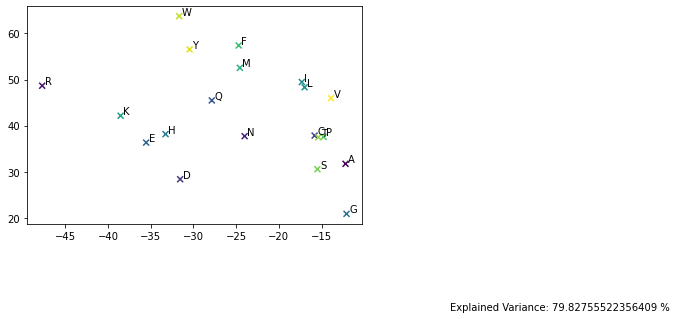

In [77]:
import matplotlib.pyplot as plt
plt.scatter(new_base_df[0], new_base_df[1], c=range(len(new_base_df)), marker='x')
plt.text(0,0,f'Explained Variance: {variance_explained * 100} %')

for idx, aa in enumerate(df.AA):
    plt.text(new_base_df[0][idx] + 0.3, new_base_df[1][idx] + 0.3, aa)

array([2, 0, 1])